<a href="https://colab.research.google.com/github/Aishuav01/LinearRegressionModel/blob/main/LinearRegrssionMedicalInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TechProjects/LinearRegressionEcommerceDataset/MedicalInsuranceDS/Medical-Insurance.csv",encoding='unicode_escape')

Age || Age in years || integer
Gender || Male or Female || integer (1 or 2)
BMI || Body mass index || float
No of children || Number of children || integer
Smoker || Whether smoker or not || integer (0 or 1)
Region || Which US region - NW, NE, SW, SE || integer (1,2,3 or 4 respectively)
Charges || Annual Insurance charges in USD || float

In [ ]:
df.columns = ['Age','Gender','BMI','Children','isSmoker','Region','Cost']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2771 non-null   object 
 1   Gender    2771 non-null   int64  
 2   BMI       2771 non-null   float64
 3   Children  2771 non-null   int64  
 4   isSmoker  2771 non-null   object 
 5   Region    2771 non-null   int64  
 6   Cost      2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
df.describe()

,Gender,BMI,Children,Region,Cost
count,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,1.507398,30.702360,1.102129,2.559726,13260.062289
std,0.500036,6.130324,1.214845,1.130934,12153.767132
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.495000,1.000000,3.000000,9304.701900
75%,2.000000,34.770000,2.000000,4.000000,16516.743675
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [ ]:
# EDA

In [ ]:
df.dropna()

,Age,Gender,BMI,Children,isSmoker,Region,Cost
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [ ]:
df.describe()


,Gender,BMI,Children,Region,Cost
count,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,1.507398,30.702360,1.102129,2.559726,13260.062289
std,0.500036,6.130324,1.214845,1.130934,12153.767132
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.495000,1.000000,3.000000,9304.701900
75%,2.000000,34.770000,2.000000,4.000000,16516.743675
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [ ]:
df.fillna(0)

,Age,Gender,BMI,Children,isSmoker,Region,Cost
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


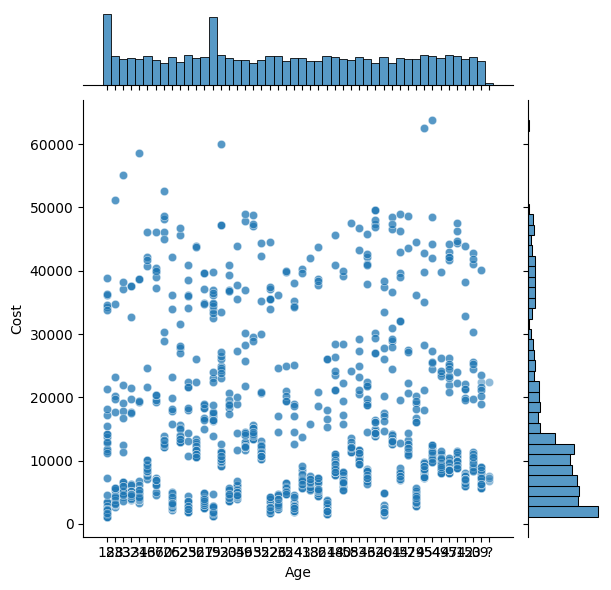

In [ ]:
sns.jointplot(x="Age", y="Cost", data=df, alpha=0.5)

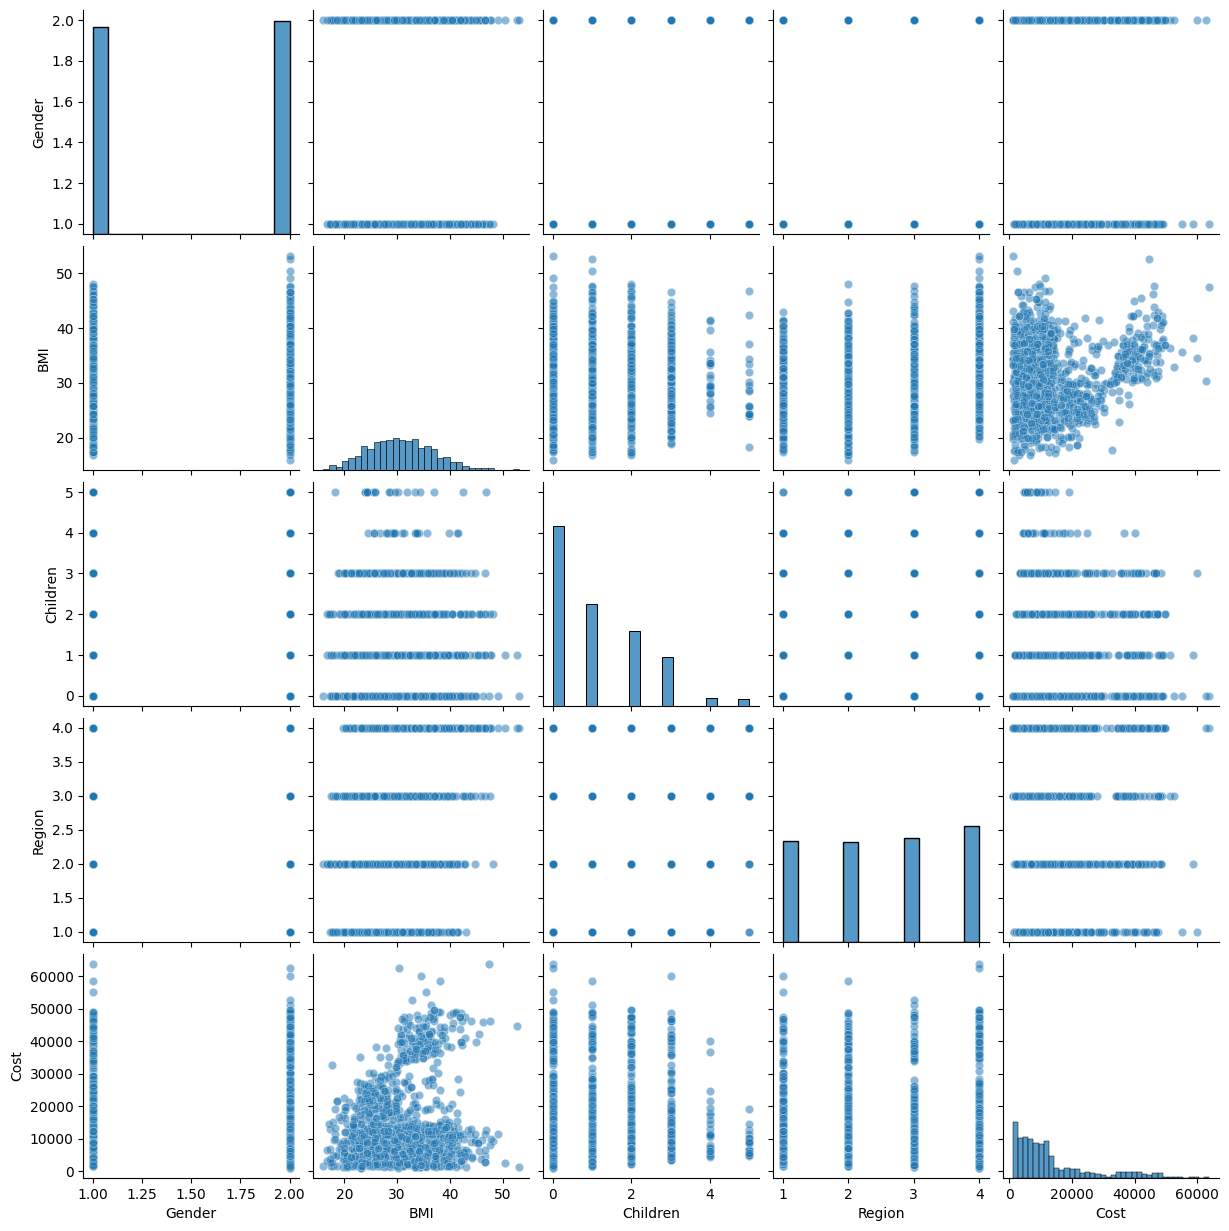

In [ ]:
sns.pairplot( data=df, kind='scatter', plot_kws={'alpha':0.3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2771 non-null   object 
 1   Gender    2771 non-null   int64  
 2   BMI       2771 non-null   float64
 3   Children  2771 non-null   int64  
 4   isSmoker  2771 non-null   object 
 5   Region    2771 non-null   int64  
 6   Cost      2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
df['Age']=df['Age'].replace('?',1)

In [ ]:
df['Age']=pd.to_numeric(df['Age'])

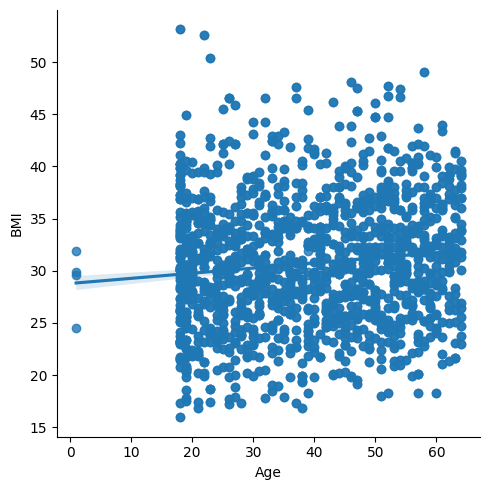

In [ ]:
sns.lmplot(x="Age", y="BMI", data=df)

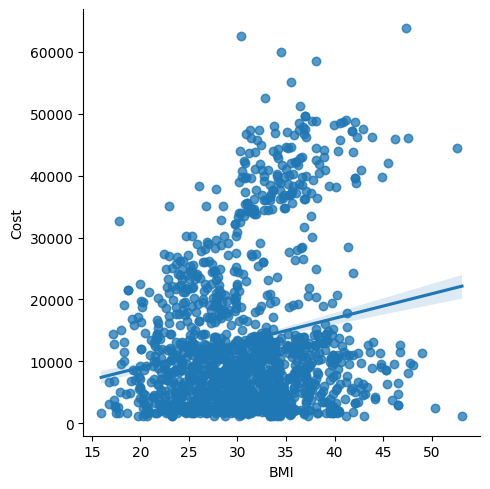

In [ ]:
sns.lmplot(x="BMI", y="Cost", data=df, scatter_kws=({'alpha':0.5}))

In [ ]:
from sklearn.model_selection import train_test_split # For older versions

In [ ]:
X = df[['BMI','Age','Gender','Region']]
X

,BMI,Age,Gender,Region
0,33.770,18,2,4
1,33.000,28,2,4
2,22.705,33,2,1
3,28.880,32,2,1
4,25.740,31,1,4
...,...,...,...,...
2766,45.320,47,1,4
2767,34.600,21,1,3
2768,26.030,19,2,1
2769,18.715,23,2,1


In [ ]:
Y= df['Cost']
Y

,Cost
0,1725.55230
1,4449.46200
2,21984.47061
3,3866.85520
4,3756.62160
...,...
2766,8569.86180
2767,2020.17700
2768,16450.89470
2769,21595.38229


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
X_train

,BMI,Age,Gender,Region
1684,28.880,48,1,1
862,19.855,36,1,2
1992,23.655,59,1,1
889,26.885,64,1,1
1362,46.530,26,2,4
...,...,...,...,...
1638,30.300,27,2,3
1095,34.960,51,1,2
1130,45.900,27,2,3
1294,22.000,20,2,3


In [ ]:
X_train, X_test, y_train, y_test

(         BMI  Age  Gender  Region
 1684  28.880   48       1       1
 862   19.855   36       1       2
 1992  23.655   59       1       1
 889   26.885   64       1       1
 1362  46.530   26       2       4
 ...      ...  ...     ...     ...
 1638  30.300   27       2       3
 1095  34.960   51       1       2
 1130  45.900   27       2       3
 1294  22.000   20       2       3
 860   28.000   38       1       3
 
 [1939 rows x 4 columns],
          BMI  Age  Gender  Region
 1106  26.220   50       1       1
 1321  38.830   62       2       4
 2313  39.160   62       1       4
 2274  33.630   57       2       1
 1432  34.770   28       1       1
 ...      ...  ...     ...     ...
 1900  35.700   58       2       3
 647   28.500   18       2       2
 2438  29.800   47       2       3
 2452  42.655   39       2       2
 1628  35.300   40       2       3
 
 [832 rows x 4 columns],
 1684     9249.49520
 862      5458.04645
 1992    25678.77845
 889     29330.98315
 1362     2927.06470


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([ 321.99050497,  249.64056442, 1228.48532117, -271.11600529])

In [ ]:
cdf =pd.DataFrame(lm.coef_,X.columns, columns=['Coef'])

In [ ]:
cdf

,Coef
BMI,334.943022
Age,251.141223
Gender,1221.038366
Region,-194.235649


In [ ]:
pred = lm.predict(X_test)

In [ ]:
pred

array([14387.14644831, 21858.27079438, 20736.04233985, ...,
        9802.86503054, 15199.17828035, 11198.06314776])

Text(0.5, 0, 'Prediction')

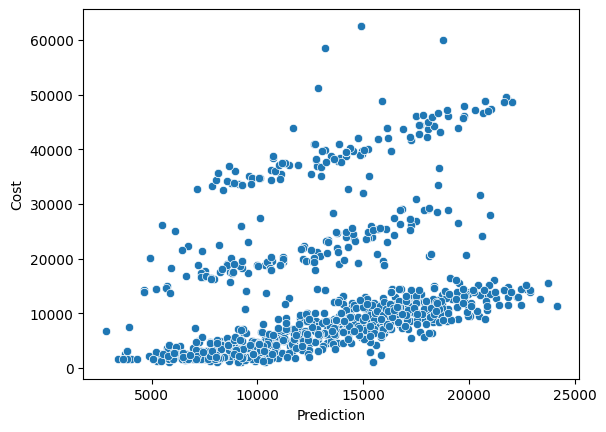

In [ ]:
sns.scatterplot(x=pred, y=y_test)
plt.xlabel('Prediction')

<Axes: ylabel='Cost'>

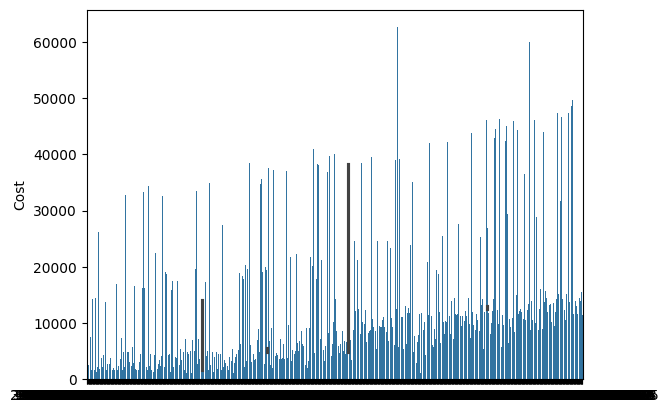

In [ ]:
sns.barplot(x=pred, y=y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
print("MAE", mean_absolute_error(y_test,pred))

MAE 9004.417071139607


In [ ]:
print("MSE",mean_squared_error(y_test,pred))

MSE 129768155.36251028


In [ ]:
print("RMSE", math.sqrt(mean_squared_error(y_test,pred)))

RMSE 11391.582653982294


In [ ]:
residuals = y_test - pred

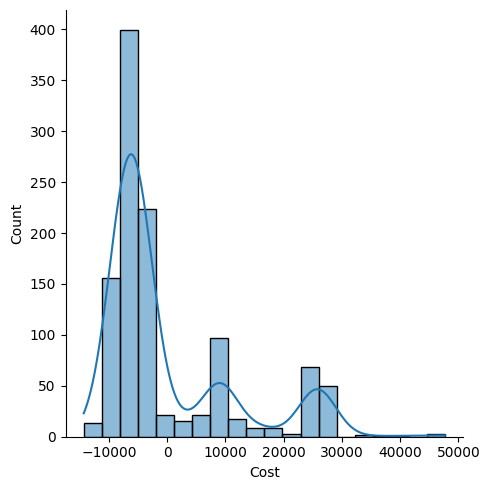

In [ ]:
sns.displot(residuals, bins=20, kde=True)

In [ ]:
import pylab
import scipy.stats as stats

((array([-3.22729868, -2.96434635, -2.81775299, ...,  2.81775299,
          2.96434635,  3.22729868]),
  array([-14315.0874809 , -14315.0874809 , -13403.22391434, ...,
          45374.57751445,  47705.75146791,  47705.75146791])),
 (np.float64(9903.618454039486),
  np.float64(-100.63393263932201),
  np.float64(0.8672079178127251)))

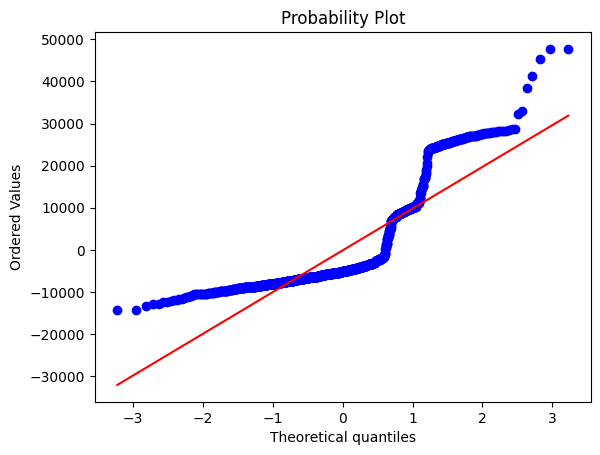

In [ ]:
stats.probplot(residuals, dist="norm", plot=pylab)

,BMI,Age,Gender,Region
1106,26.22,50,1,1
1321,38.83,62,2,4
2313,39.16,62,1,4
2274,33.63,57,2,1
1432,34.77,28,1,1
...,...,...,...,...
2462,26.03,21,2,2
2507,36.86,53,1,1
273,27.55,25,2,1
71,28.10,53,1,3


In [ ]:
X_test = [[]]